In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# KNN classification of penguins.  Hey, you look kind of like that one, and 
# they're a Gentoo, so...

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [ ]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
# !curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [ ]:
# Check that the download was data and not a webpage with an error...
# !head penguins.json

In [70]:
penguins = pd.read_json("../data/penguins.json")

In [71]:
# Read in the two sets once they are fixed an in a file:
penguins_train=pd.read_csv( "../data/penguins_train.csv")
penguins_test = pd.read_csv( "../data/penguins_test.csv")
penguins = penguins_train


In [72]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       117
 Gentoo        92
 Chinstrap     48
 Name: Species, dtype: int64,
 257)

In [73]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

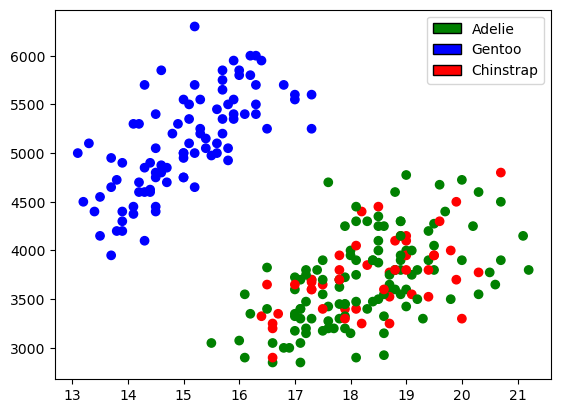

In [74]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

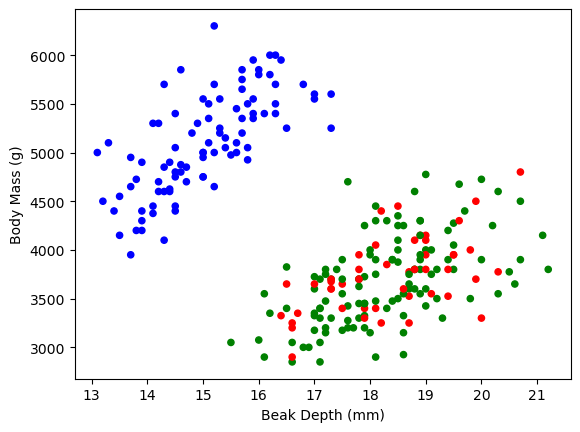

In [75]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [76]:
# Since I have to clean.. and I have to clean training and test,
# put all the essential cleaning in a funciton and call it three times.

def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins_test = penguincleanit(penguins_test)
penguins_train = penguincleanit(penguins_train)

In [77]:
penguinclean.LABEL.value_counts()


0    116
1     91
2     48
Name: LABEL, dtype: int64

In [78]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(117, 92, 48)

In [79]:
len(penguins)

257

/Users/Shared/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


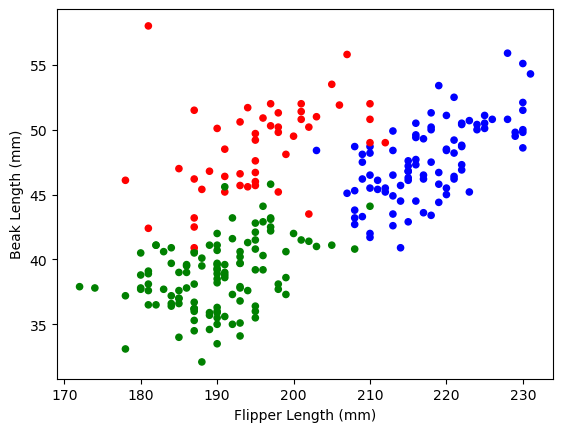

In [80]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
labels= penguins_train.LABEL.values
X = penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
XTEST = penguins_test[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values
YTEST = penguins_test["LABEL"]

In [83]:
np.isnan(X).sum()

0

In [84]:
fit = MLPClassifier(hidden_layer_sizes=(6,6)).fit(X, labels)  

In [ ]:
dir(fit)

In [86]:
fit.predict(XTEST)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [88]:
X[0:10], labels

(array([[  17.9, 3400. ,   50.1,  190. ],
        [  15. , 4950. ,   47.5,  218. ],
        [  15.2, 5700. ,   50. ,  218. ],
        [  17.5, 3900. ,   41.1,  190. ],
        [  15. , 4750. ,   47.7,  216. ],
        [  14.6, 5850. ,   48.4,  213. ],
        [  20.5, 3775. ,   37.3,  199. ],
        [  17.1, 3050. ,   39. ,  191. ],
        [  21.1, 4150. ,   39.2,  196. ],
        [  18.1, 2900. ,   34.5,  187. ]]),
 array([2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0,
        1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2

In [89]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False).fit(labels.reshape(-1, 1)) 
YONEHOT = ohe.transform(labels.reshape(-1, 1))
YTESTOH = ohe.transform(YTEST.values.reshape(-1, 1))

In [107]:
fit = MLPClassifier( max_iter=400).fit(X, YONEHOT) 

In [103]:
XTEST.shape, X.shape, YONEHOT.shape

((87, 4), (255, 4), (255, 3))

In [104]:
YPRED = fit.predict(XTEST)
YPRED[0:10], OneHotEncoder(sparse=False).fit_transform(YTEST.values.reshape(-1,1))[0:10]


(array([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]]))

In [ ]:
# This is giving me predictions that are not classifications... 
# rows that are all zeros, rows with more than one 1 in them.

# according to https://stats.stackexchange.com/questions/243588/how-to-apply-softmax-as-activation-function-in-multi-layer-perceptron-in-scikit
# MLPClassifier chooses the output nonlinear function according to 
# an auto-detection of Y's data type.



In [111]:
fit.out_activation_ = 'softmax'
YPRED = fit.predict(XTEST)
YPRED[0:10]


array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [135]:
np.argmax(YPRED, axis=1)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [112]:
YPRED.sum(axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
# Some of them are 0,0,0 still.  


In [99]:
len(fit.coefs_)

2

In [100]:
fit.coefs_[0].shape, fit.coefs_[1].shape

((4, 100), (100, 3))

In [110]:
fit.out_activation_

'softmax'

In [ ]:
fit = MLPClassifier(out_activation_).fit(X, YONEHOT) 

In [ ]:
type(YTEST), type(YPRED), YTEST.shape, YPRED.shape

In [ ]:
YTESTOH.shape, YPRED.shape

In [ ]:
type(YTESTOH), type(YPRED)

In [ ]:
YTESTOH[0:4], YPRED[0:4]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix( YTESTOH, YPRED)

In [ ]:
len(XTEST)

In [115]:
mean0 = penguins_train["Beak Depth (mm)"].mean()
mean1 = penguins_train["Body Mass (g)"].mean() 
mean2 = penguins_train['Beak Length (mm)'].mean()
mean3 = penguins_train["Flipper Length (mm)"].mean()

In [119]:
xgrid = np.arange(170, 230,2) # range for flipper length
ygrid = np.arange(30,59,1)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([mean0, mean1*1.05, ygrid[j], xgrid[i]])
       # print(x)
        z[i,j]= np.argmax(fit.predict(x[np.newaxis,:]))

(30, 29) (30, 29) (30, 29)


In [120]:
XTEST[5]

array([  17. , 6050. ,   59.6,  230. ])

In [121]:
fit.predict([[  13.8, 4206 ,  54. ,         222.         ]])

array([[1, 0, 0]])

(array([ 2., 19., 40., 60., 28., 11., 31., 29., 23., 12.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

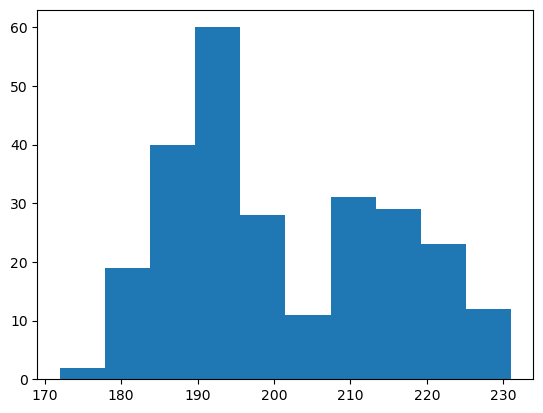

In [122]:
plt.hist(penguins_train["Flipper Length (mm)"])

Text(0, 0.5, 'Number of birds')

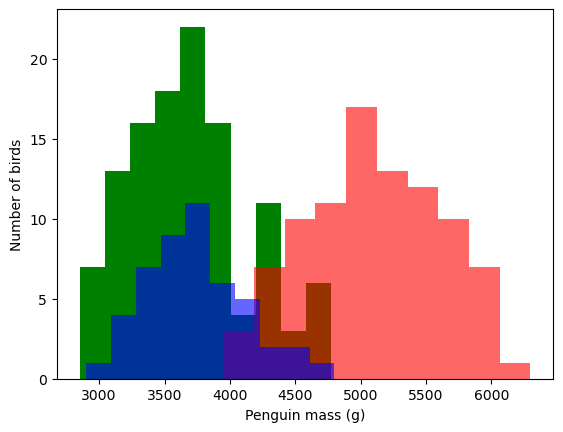

In [123]:
plt.hist(penguins_train.query("SP1==True")["Body Mass (g)"], color='g')
plt.hist(penguins_train.query("SP2==True")["Body Mass (g)"], color='r', alpha=0.6)
plt.hist(penguins_train.query("SP3==True")["Body Mass (g)"], color='b', alpha=0.6)
plt.xlabel("Penguin mass (g)")
plt.ylabel("Number of birds")

In [124]:
fit.predict([XTEST[0 ]])

array([[0, 1, 0]])

Text(0, 0.5, 'Flipper Length (mm)')

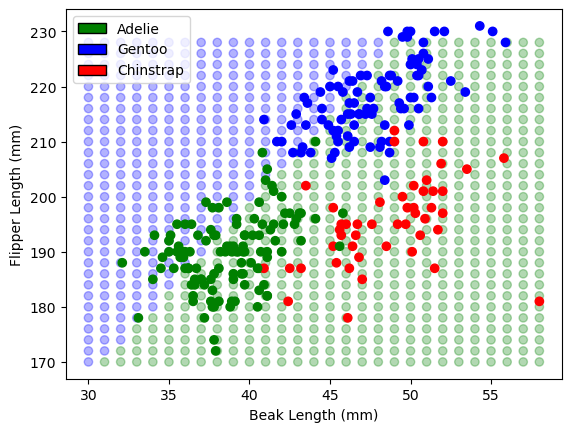

In [125]:
colorsnum = { 0 : "green", 1: "blue", 2:"red"} 
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(yax,xax, color=c, alpha=0.3)

plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.xlabel("Beak Length (mm)")
plt.ylabel( "Flipper Length (mm)")

In [126]:
from collections import Counter
Counter(z)

TypeError: unhashable type: 'numpy.ndarray'

In [133]:
np.unique(z, return_counts=True)

(array([0., 1.]), array([556, 314]))

In [132]:
z

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0